In [1]:
import os
import pandas as pd 
import numpy as np 
import nltk
import re
from zipfile import ZipFile 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## DATA PREPROCESSING

In [2]:
def unzip(filename):
    with ZipFile(filename, 'r') as zObject:
        zObject.extractall(path="/kaggle/working/") 

In [3]:
for i in os.listdir('/kaggle/input/word2vec-nlp-tutorial'):
    if(i!='sampleSubmission.csv'):
        unzip(os.path.join('/kaggle/input/word2vec-nlp-tutorial',i))

In [4]:
df_train = pd.read_csv('/kaggle/input/extracted-dataset/labeledTrainData.tsv',sep = '\t')
df_test = pd.read_csv('/kaggle/input/extracted-dataset/testData.tsv',sep = '\t')
df_toPredict = pd.read_csv('/kaggle/input/extracted-dataset/unlabeledTrainData.tsv', sep="\t", on_bad_lines='skip')

In [5]:
df_train

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [6]:
df_test

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...
...,...,...
24995,2155_10,"Sony Pictures Classics, I'm looking at you! So..."
24996,59_10,I always felt that Ms. Merkerson had never got...
24997,2531_1,I was so disappointed in this movie. I am very...
24998,7772_8,"From the opening sequence, filled with black a..."


In [7]:
df_toPredict

,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."
...,...,...
49993,18984_0,The original Man Eater by Joe D'Amato is somew...
49994,16433_0,When Home Box Office was in it's early days mo...
49995,16006_0,Griffin Dunne was born into a cultural family....
49996,40155_0,"Not a bad story, but the low budget rears its ..."


In [8]:
df_train1 = df_train.drop('id',axis = 1)
df_test1 = df_test.drop('id',axis = 1)
df_train1

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...
...,...,...
24995,0,It seems like more consideration has gone into...
24996,0,I don't believe they made this film. Completel...
24997,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,0,This 30 minute documentary Buñuel made in the ...


In [9]:
X = df_train['review']
Y = df_train['sentiment']

# Stemming 

In [10]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        print(i,"/",len(X))
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))] #TO REMOVE STOP WORDS LIKE THE, A ETC 
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X,corpus_train)

0 / 25000
1 / 25000
2 / 25000
3 / 25000
4 / 25000
5 / 25000
6 / 25000
7 / 25000
8 / 25000
9 / 25000
10 / 25000
11 / 25000
12 / 25000
13 / 25000
14 / 25000
15 / 25000
16 / 25000
17 / 25000
18 / 25000
19 / 25000
20 / 25000
21 / 25000
22 / 25000
23 / 25000
24 / 25000
25 / 25000
26 / 25000
27 / 25000
28 / 25000
29 / 25000
30 / 25000
31 / 25000
32 / 25000
33 / 25000
34 / 25000
35 / 25000
36 / 25000
37 / 25000
38 / 25000
39 / 25000
40 / 25000
41 / 25000
42 / 25000
43 / 25000
44 / 25000
45 / 25000
46 / 25000
47 / 25000
48 / 25000
49 / 25000
50 / 25000
51 / 25000
52 / 25000
53 / 25000
54 / 25000
55 / 25000
56 / 25000
57 / 25000
58 / 25000
59 / 25000
60 / 25000
61 / 25000
62 / 25000
63 / 25000
64 / 25000
65 / 25000
66 / 25000
67 / 25000
68 / 25000
69 / 25000
70 / 25000
71 / 25000
72 / 25000
73 / 25000
74 / 25000
75 / 25000
76 / 25000
77 / 25000
78 / 25000
79 / 25000
80 / 25000
81 / 25000
82 / 25000
83 / 25000
84 / 25000
85 / 25000
86 / 25000
87 / 25000
88 / 25000
89 / 25000
90 / 25000
91 / 2500

In [11]:
corpus_train[:4]

['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one leve

In [12]:
cv =TfidfVectorizer(max_features = 10000)
X = cv.fit_transform(corpus_train).toarray()

In [13]:
X.shape , Y.shape

((25000, 10000), (25000,))

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
import warnings
warnings.filterwarnings('ignore')

# MODEL

In [16]:
model = MultinomialNB()
model.fit(X_train , Y_train)

MultinomialNB()

In [17]:
Y_pred = model.predict(X_test)

In [18]:
accuracy_score(Y_test,Y_pred)

0.8554

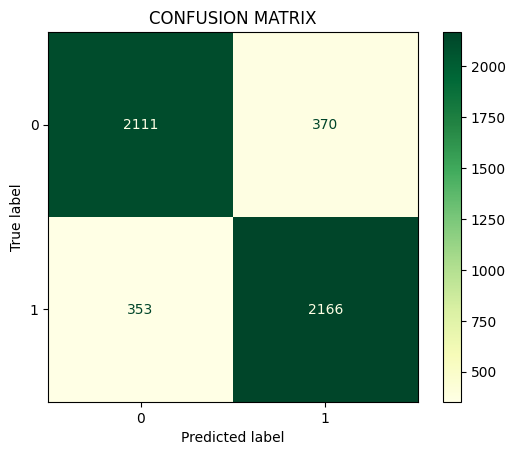

In [19]:
cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = plt.cm.YlGn)
plt.title('CONFUSION MATRIX')
plt.show()

In [20]:
def test_model(sentence):
    sen = cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return "Positive"
    else:
        return "Negative"

In [21]:
a = "The was very good at being bad"
res = test_model(a)
print(res)

Negative


In [22]:
b = "The was good but couldve been better"
res = test_model(b)
print(res)

Negative


In [23]:
b = "This movie is the best"
res = test_model(b)
print(res)

Positive
